In [2]:
import pandas as pd
# import matplotib as plt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading Dataset!

In [8]:
% cd ~/Data/TSP
% ls

/home/kurianbwnoy/Data/TSP
cities.csv


In [9]:
df = pd.read_csv('/home/kurianbwnoy/Data/TSP/cities.csv')
df.head()

CityId            X            Y
0       0   316.836739  2202.340707
1       1  4377.405972   336.602082
2       2  3454.158198  2820.053011
3       3  4688.099298  2935.898056
4       4  1010.696952  3236.750989

In [14]:
df.describe()

CityId              X              Y
count  197769.000000  197769.000000  197769.000000
mean    98884.000000    2741.169734    1859.277703
std     57091.137031    1474.870239     985.144313
min         0.000000       1.871925       0.000000
25%     49442.000000    1439.292001    1054.234324
50%     98884.000000    2772.522934    1946.624393
75%    148326.000000    4246.994405    2736.536831
max    197768.000000    5099.502142    3397.809824

We are Plotting the files

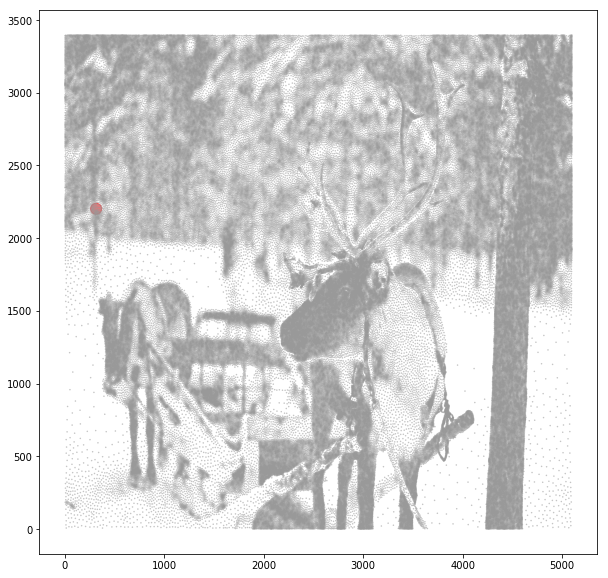

In [18]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['X'],df['Y'],marker = '.',c=(df.CityId != 0).astype(int), cmap='Set1', alpha = 0.6, s = 500*(df.CityId == 0).astype(int)+1)
plt.show()

# A DUMP SOLUTION to this

In [23]:
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
prime_cities = sieve_of_eratosthenes(max(df.CityId))



In [24]:
def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            np.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance

dumbest_path = list(df.CityId[:].append(pd.Series([0])))
print('Total distance with the dumbest path is '+ "{:,}".format(total_distance(df,dumbest_path)))

Total distance with the dumbest path is 446,884,407.5212135


## Plotting 2000 stupid point 

In [30]:
df_path = pd.merge_ordered(pd.DataFrame({'CityId':dumbest_path}),df,on=['CityId'])
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:2000,]['X'], df_path.iloc[0:2000,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:2000,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:2000,]['X'][i], df_path.iloc[0:2000,]['Y'][i]),size = 15)


In [32]:
sorted_cities = list(df.iloc[1:,].sort_values(['X','Y'])['CityId'])
sorted_cities = [0] + sorted_cities + [0]
print('Total distance with the sorted city path is '+ "{:,}".format(total_distance(df,sorted_cities)))

Total distance with the sorted city path is 196,478,811.25956938


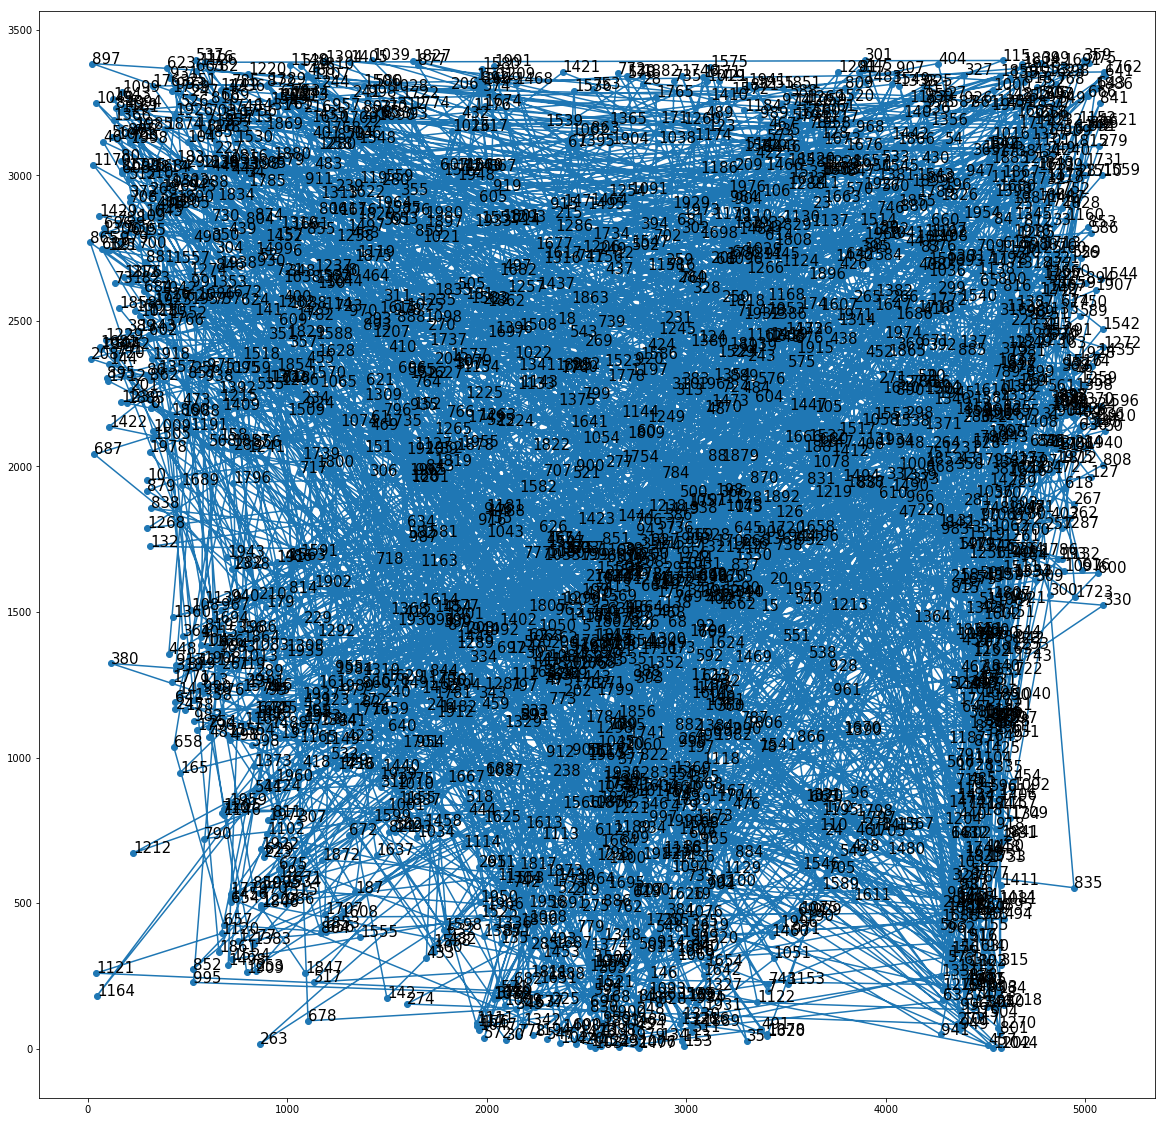

In [33]:
df_path = pd.merge_ordered(pd.DataFrame({'CityId':sorted_cities}),df,on=['CityId'])
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:2000,]['X'], df_path.iloc[0:2000,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:2000,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:2000,]['X'][i], df_path.iloc[0:2000,]['Y'][i]),size = 15)


## Optimising for grid sizes

In [34]:
for i in range(100,600,100):
    for j in range(100,600,100):
        df['Ycuts'] = pd.cut(df.Y,j)
        df['Xcuts'] = pd.cut(df.X,i)
        zigzag_sorted_cities1 = list(df.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
        zigzag_sorted_cities2 = list(df.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'], ascending = [True,False,True,True])['CityId'])
        chooser_pattern = list(df.iloc[1:].sort_values(['Xcuts']).groupby(['Xcuts']).ngroup()%2)

        zigzag_cities = [zigzag_sorted_cities1[i] if chooser_pattern[i] == 0 else zigzag_sorted_cities2[i] for i in range(len(chooser_pattern))]
        zigzag_cities =  [0] + zigzag_cities + [0]
        print('Total distance with the Zig-Zag with grid city path with grid size (' + str(i) + ',' + str(j) + ") is {:,}".format(total_distance(df,zigzag_cities)))

Total distance with the Zig-Zag with grid city path with grid size (100,100) is 3,243,001.24552974
Total distance with the Zig-Zag with grid city path with grid size (100,200) is 2,483,012.2590593975
Total distance with the Zig-Zag with grid city path with grid size (100,300) is 2,458,138.678978236
Total distance with the Zig-Zag with grid city path with grid size (100,400) is 2,600,638.502037033
Total distance with the Zig-Zag with grid city path with grid size (100,500) is 2,779,870.5123764514
Total distance with the Zig-Zag with grid city path with grid size (200,100) is 3,354,740.6090092813
Total distance with the Zig-Zag with grid city path with grid size (200,200) is 2,429,013.5317182303
Total distance with the Zig-Zag with grid city path with grid size (200,300) is 2,247,440.072765479
Total distance with the Zig-Zag with grid city path with grid size (200,400) is 2,242,396.9024366746
Total distance with the Zig-Zag with grid city path with grid size (200,500) is 2,281,677.008044

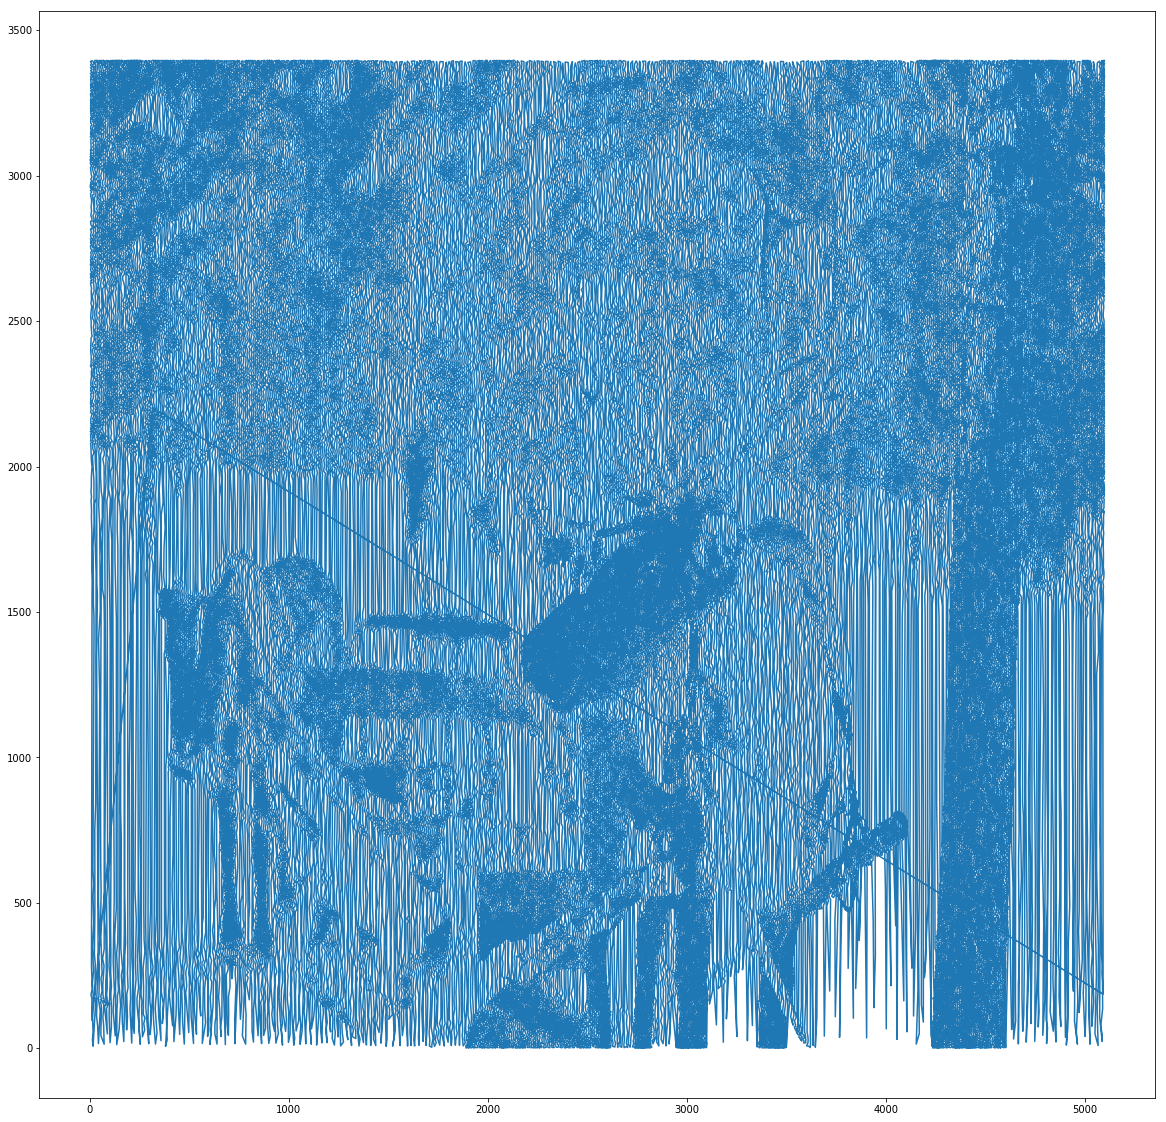

In [37]:
df_path =  pd.DataFrame({'CityId':zigzag_cities}).merge(df,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path['X'], df_path['Y'])

In [4]:
import pandas as pd
tour = pd.read_csv('/home/kurianbwnoy/Downloads/submission(1).csv')['Path'].tolist()
cities = pd.read_csv('/home/kurianbwnoy/Data/TSP/cities.csv')

# Define a function for length of a path:
import numpy as np
from sympy import primerange
primes = list(primerange(0, len(cities)))
def score_tour(tour):
    # length of any given tour with primes calculation
    df = cities.reindex(tour + [0]).reset_index()
    df['prime'] = df.CityId.isin(primes).astype(int)
    df['dist'] = np.hypot(df.X - df.X.shift(-1), df.Y - df.Y.shift(-1))
    df['penalty'] = df['dist'][9::10] * (1 - df['prime'][9::10]) * 0.1
    return df.dist.sum() + df.penalty.sum()

# Let's take a look at our tour
print("Tour path (0-5):",tour[0:5])
# And the flipped tour looks like:
tourflip = tour[::-1]
print("Flipped tour path (0-5):", tourflip[0:5])
# The scores of our tours are:
print("Score of original tour:", score_tour(tour))
print("Score of flipped tour:", score_tour(tourflip))

# If the flipped tour is quicker, change our tour:
if score_tour(tourflip) < score_tour(tour):
    print("The total improvement was:", abs(score_tour(tourflip) - score_tour(tour)))
    tour = tourflip 
    print("The better of the original/flipped tour is:", tour[0:5])

pd.DataFrame({'Path': list(tour)}).to_csv('submission1.csv', index=False)

Tour path (0-5): [0, 78934, 111804, 52086, 89712]
Flipped tour path (0-5): [0, 48816, 40230, 75405, 153911]
Score of original tour: 1516912.3751145517
Score of flipped tour: 1517016.3136570188


In [5]:
! ls

cities1k.tsp  linkern.csv  linkern.tour     submission.csv     Untitled.ipynb
linkern       linkern.log  submission1.csv  TSPanalyser.ipynb
